In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('zomato.csv')

# Getting top two row data

In [3]:
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


# Getting rows and col count

In [4]:
data.shape

(51717, 17)

# Getting columns data

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Drop unwanted columns axis=1(wrt cols)

In [16]:
data=data.drop(['url','address','phone','menu_item','dish_liked',
               'reviews_list'],axis=1)  
data.head()  

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Preview of data using info()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# Dropping Duplicates (Permanent change in DF removing duplicates)

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(51717, 17)

# Cleaning rate column(removing/5)

In [8]:
#first getting unique values

In [9]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
## contains string and   '-'

# Removing 'New','-' and'/5' from rate

In [10]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/') 
        value=value[0]
        return float(value)

data['rate']=data['rate'].apply(handlerate)


In [11]:
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

# Checking and handling Null values in rate col

In [12]:
data['rate'].isnull().sum()

10052

# Filling null values to mean to rate

In [13]:
data['rate'].fillna(data['rate'].mean(),inplace=True)

In [14]:
data['rate'].isnull().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# Dropping null values

In [20]:
data.dropna(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51148 non-null  object 
 1   online_order                 51148 non-null  object 
 2   book_table                   51148 non-null  object 
 3   rate                         51148 non-null  float64
 4   votes                        51148 non-null  int64  
 5   location                     51148 non-null  object 
 6   rest_type                    51148 non-null  object 
 7   cuisines                     51148 non-null  object 
 8   approx_cost(for two people)  51148 non-null  object 
 9   listed_in(type)              51148 non-null  object 
 10  listed_in(city)              51148 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# Renaming large column names

In [23]:
data.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'type'},inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   cuisines         51148 non-null  object 
 8   Cost2plates      51148 non-null  object 
 9   type             51148 non-null  object 
 10  listed_in(city)  51148 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# Finding unique locations

In [26]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [27]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# Listed_in(city) and location have common values lets only keep one

In [28]:
data=data.drop(['listed_in(city)'],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  object 
 2   book_table    51148 non-null  object 
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   cuisines      51148 non-null  object 
 8   Cost2plates   51148 non-null  object 
 9   type          51148 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


# cost2plates  have ',' in values

In [32]:
data['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [34]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
    
data['Cost2plates']=data['Cost2plates'].apply(handlecomma)
data['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [35]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Rest column

In [39]:
rest_type=data['rest_type'].value_counts()

In [41]:
# making new col containing ret_type<1000
rest_type_lessthan1000=rest_type[rest_type<1000]
rest_type_lessthan1000

Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [46]:
def handle_rest_type(value):
    if(value in rest_type_lessthan1000):
        return 'others'
    else:
        return value
data['rest_type']=data['rest_type'].apply(handle_rest_type)
data['rest_type'].value_counts()

Quick Bites           19046
Casual Dining         10273
others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

In [47]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet


# Cleaning location count

In [52]:
location=data['location'].value_counts()

In [57]:
# laoctaion count<300
loc_less300=location[location<300]

def handle_location(value):
    if(value in loc_less300):
        return 'others'
    else:
        return value
data['location']=data['location'].apply(handle_location)
data['location'].value_counts()

BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

In [58]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cuisines

In [60]:
data['cuisines'].value_counts()

North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2704, dtype: int64

In [62]:
# dealing less than 100
cuisines=data['cuisines'].value_counts()
culessthan100=cuisines[cuisines<100]
def handle_cuisine(value):
    if(value in culessthan100):
        return 'others'
    else:
        return value
data['cuisines']=data['cuisines'].apply(handle_cuisine)
data['cuisines'].value_counts()

others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [63]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


# type is already clean

In [64]:
data['type'].value_counts()

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: type, dtype: int64

# DATA VISUALIZATION

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

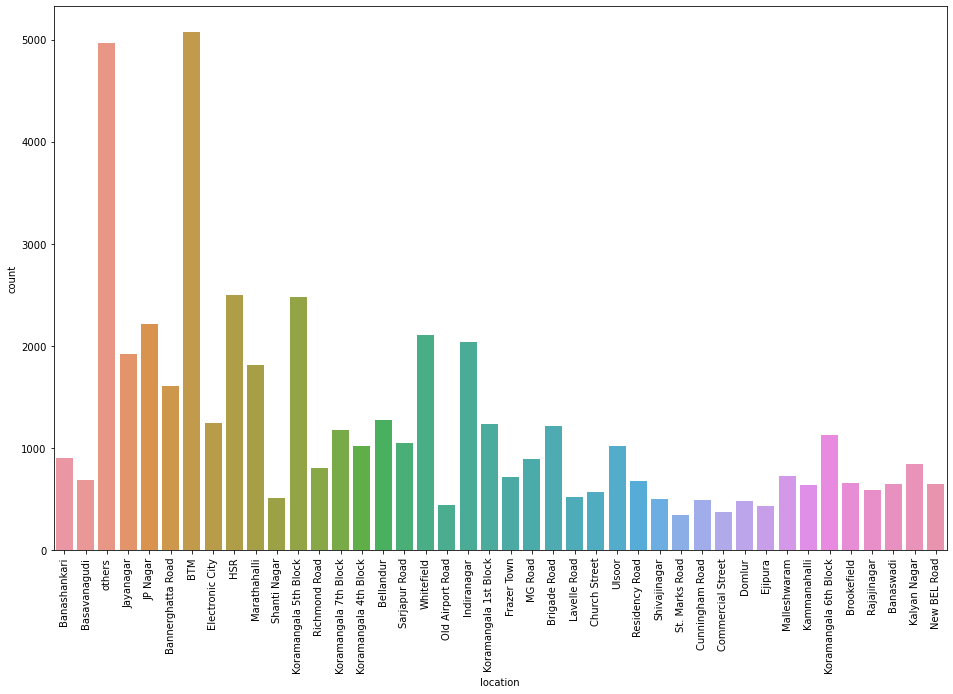

In [73]:
# location countplot
plt.figure(figsize=(16,10))
ax=sns.countplot(data['location'])
plt.xticks(rotation=90)

In [74]:
# we can see ther are many restaurants in BTM 

# VISUALIZING ONLINE ORDERS

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

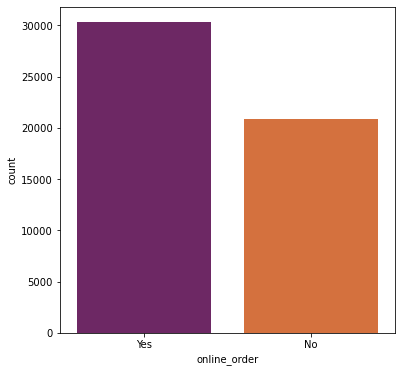

In [77]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'],palette='inferno')

# BOOKTABLE FACILITY

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

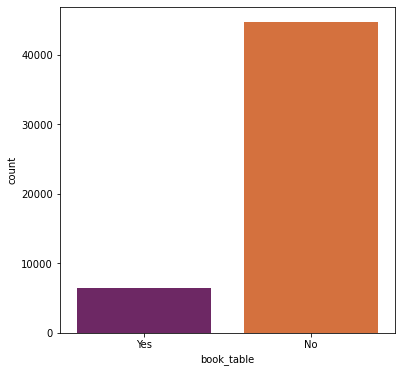

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(data['book_table'],palette='inferno')

# Online availability having advantage or not (higher rating or not)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

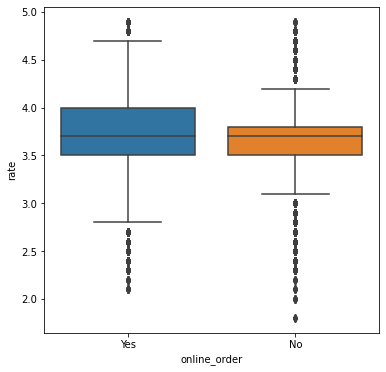

In [87]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

# Booktable availability having advantage or not (higher rating or not)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

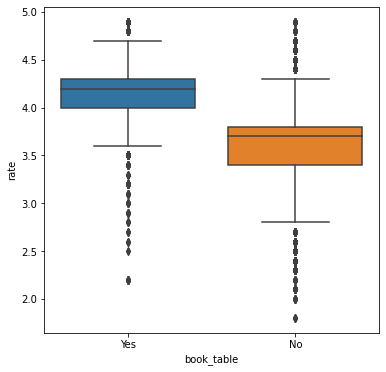

In [88]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=data)

# Types of restaurant and rate

<AxesSubplot:xlabel='type', ylabel='rate'>

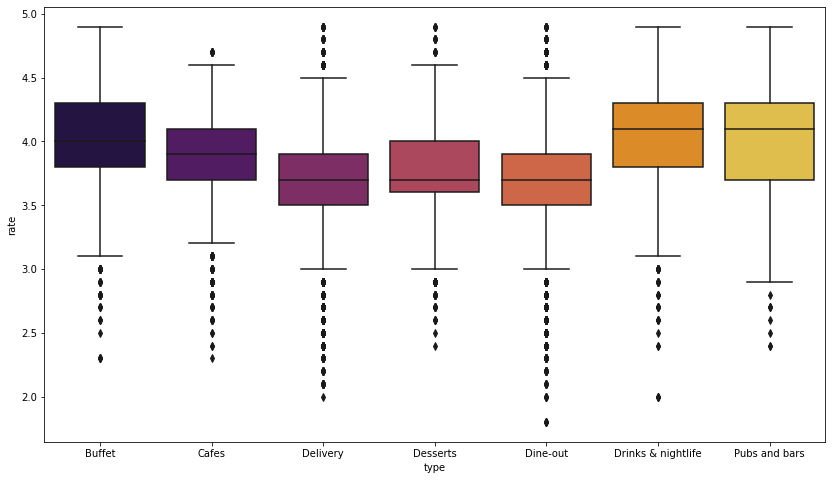

In [89]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=data,palette='inferno')